<a href="https://colab.research.google.com/github/MunJinSeo/MachineLearning/blob/main/midterm_cls_project_2020511021_%EC%84%9C%EB%AC%B8%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name (English): MunJin, Seo

Name (Korean): 서문진

Department (English): Big Data Convergence Department

ID: 2020511021

Group : Task 1 (3-class Classification): Predict the diagnosis group of subjects

### Instructions

1. Using `dataset.csv`, train the best model to perform the following tasks.

* ***Task 1*** (3-class Classification): Predict the diagnosis group of subjects
<br>Colum A (DX_bl): Diagnosis group of subject
<br>0: Cognitive normal
<br>1: Mild cognitive impairment
<br>2: Alzheimer’s disease

* ***Task 2*** (3-logit Regression): Predict the cognitive assessment scores of subjects
<br>Colum B (ADAS11): Alzheimer's Disease Assessment Scale (11 questions version)
<br>Colum C (ADAS13): Alzheimer's Disease Assessment Scale (13 questions version)
<br>Colum D (MMSE): Mini-Mental State Examination

2. Save the best model.

A minimal example code for your reference

```python
!wget https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib
from google.colab import files

train_df = pd.read_csv('dataset.csv')

X = train_df[[c for c in train_df.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE']]]
y = train_df['DX_bl']
y1  = train_df['ADAS11']
y2  = train_df['ADAS13']
y3  = train_df['MMSE']

X = X.fillna(0)

clf = RandomForestClassifier(random_state=42).fit(X, y)

reg1 = RandomForestRegressor(random_state=42).fit(X, y1)
reg2 = RandomForestRegressor(random_state=42).fit(X, y2)
reg3 = RandomForestRegressor(random_state=42).fit(X, y3)

joblib.dump(clf, 'clf.pkl', compress=1)
joblib.dump(reg1, 'reg1.pkl', compress=1)
joblib.dump(reg2, 'reg2.pkl', compress=1)
joblib.dump(reg3, 'reg3.pkl', compress=1)

files.download('clf.pkl')
files.download('reg1.pkl')
files.download('reg2.pkl')
files.download('reg3.pkl')
```



### Compile the below code to get the dataset!!

In [2]:
!wget https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv

--2022-05-13 14:46:31--  https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1247513 (1.2M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   1.19M  --.-KB/s    in 0.008s  

2022-05-13 14:46:32 (152 MB/s) - ‘dataset.csv’ saved [1247513/1247513]



## 1) 실행에 필요한 library import

In [33]:
### START HERE !! ###

import pandas as pd
import numpy as np
np.random.seed(20220513)

# 모델 비교하기 위해 각 모델library import
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# To plot pretty figures --강의 교재 참고하여 추가함
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline
import matplotlib as mpl #그래프를 그리기 위한 Library
import matplotlib.pyplot as plt #그래프를 그리기 위한 Library

from sklearn.model_selection import train_test_split # sklearn에서 제공하는 데이터 분리 Library
from sklearn.model_selection import StratifiedShuffleSplit  # sklearn에서 제공하는 데이터 분리 Library

from sklearn.preprocessing import MinMaxScaler #sklearn에서 제공하는 Feature Scaling Library

from sklearn.model_selection import cross_val_score # 교차검증(Cross-Validation)  library import
from sklearn.model_selection import cross_val_predict # 교차검증(Cross-Validation)  library import, Confusion Matrix 평가를 위함

#from sklearn.metrics import mean_squared_error #평가 -> RMSE : 루트 평균 제곱 오차, MSE : 평균 제곱 오차
from sklearn.metrics import confusion_matrix #평가
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import precision_recall_curve, roc_curve, auc # roc곡선: 양성으로 잘못판단한 것에 의한 진짜 양성의 비율함수
from yellowbrick.classifier import ROCAUC #roc 곡선 및 AUC 쉽게 그리도록 지원
from sklearn.metrics import roc_auc_score, accuracy_score #정확도 
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV # sklearn에서 제공하는 하이퍼파라미터 조합 찾기

import joblib # 내 모델을 외부 저장/로딩
from google.colab import files

## 2) 데이터 로딩 및 확인

In [4]:
all_df = pd.read_csv('dataset.csv') # 데이터 로딩

In [194]:
all_df #데이터 확인해보기

,DX_bl,ADAS11,ADAS13,MMSE,ST102CV,ST103CV,ST104CV,ST105CV,ST106CV,ST107CV,...,ST84TA,ST85TA,ST90TA,ST91TA,ST93TA,ST94TA,ST95TA,ST97TA,ST98TA,ST99TA
0,0,0.00,0.00,30,5010,2418,4905,2749,3689,2095,...,2.603,3.149,2.631,3.247,2.783,2.523,2.588,2.441,2.346,3.215
1,0,0.00,1.00,30,3422,1961,3596,2240,3269,2198,...,2.556,2.570,2.448,2.697,3.004,2.080,2.561,1.854,2.467,2.947
2,0,1.00,1.00,29,5061,1829,3945,2793,5027,2913,...,2.723,2.738,2.514,3.007,2.501,2.400,2.559,2.047,2.590,2.854
3,0,1.00,1.00,29,3574,1749,4072,2378,3045,2259,...,2.381,2.557,2.312,2.629,2.010,1.965,2.364,1.803,2.119,2.816
4,0,1.00,1.00,29,4085,1846,3325,2672,3212,1759,...,2.456,2.859,2.641,2.999,2.155,2.371,2.582,2.104,2.259,3.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,2,37.00,51.00,21,3250,1596,2503,1500,3515,1831,...,2.506,2.259,2.061,2.571,1.775,1.801,2.203,1.626,2.220,2.384
1603,2,37.00,52.00,20,2605,1818,2719,1931,3244,1924,...,2.475,2.333,2.099,2.288,2.428,2.002,2.268,1.822,2.305,2.483
1604,2,38.00,50.00,19,2975,2042,4444,1857,3358,1783,...,2.644,2.493,1.832,2.699,1.908,2.087,2.610,1.847,2.569,2.627
1605,2,38.00,51.00,20,3501,790,2313,1589,3326,1324,...,2.010,1.738,2.103,2.435,2.125,1.750,2.243,1.511,1.995,2.545


In [5]:
print( all_df.info() ) #데이터 컬럼별 건수, type등 표시
#print( all_df.head() ) #데이터 앞쪽 5개 row 데이터 표시
#print( all_df.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
#print( all_df["DX_bl"].value_counts() )
print( all_df.value_counts() )
#print( all_df["ADAS13"].describe() ) #ADAS13 데이터 count, mean, std, min, 25%,50%,75%, max 값 표시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Columns: 144 entries, DX_bl to ST99TA
dtypes: float64(76), int64(68)
memory usage: 1.8 MB
None
DX_bl  ADAS11  ADAS13  MMSE  ST102CV  ST103CV  ST104CV  ST105CV  ST106CV  ST107CV  ST108CV  ST109CV  ST110CV  ST111CV  ST113CV  ST114CV  ST115CV  ST116CV  ST117CV  ST118CV  ST119CV  ST121CV  ST123CV  ST129CV  ST130CV  ST13CV  ST14CV  ST15CV  ST23CV  ST24CV  ST25CV  ST26CV  ST31CV  ST32CV  ST34CV  ST35CV  ST36CV  ST38CV  ST39CV  ST40CV  ST43CV  ST44CV  ST45CV  ST46CV  ST47CV  ST48CV  ST49CV  ST50CV  ST51CV  ST52CV  ST54CV  ST55CV  ST56CV  ST57CV  ST58CV  ST59CV  ST60CV  ST62CV  ST64CV  ST72CV  ST73CV  ST74CV  ST82CV  ST83CV  ST84CV  ST85CV  ST90CV  ST91CV  ST93CV  ST94CV  ST95CV  ST97CV  ST98CV  ST99CV  ST102TA  ST103TA  ST104TA  ST105TA  ST106TA  ST107TA  ST108TA  ST109TA  ST110TA  ST111TA  ST113TA  ST114TA  ST115TA  ST116TA  ST117TA  ST118TA  ST119TA  ST121TA  ST123TA  ST129TA  ST130TA  ST13TA  ST14TA  ST15TA  ST23TA  

## 3) 각 컬럼별 분포도 확인

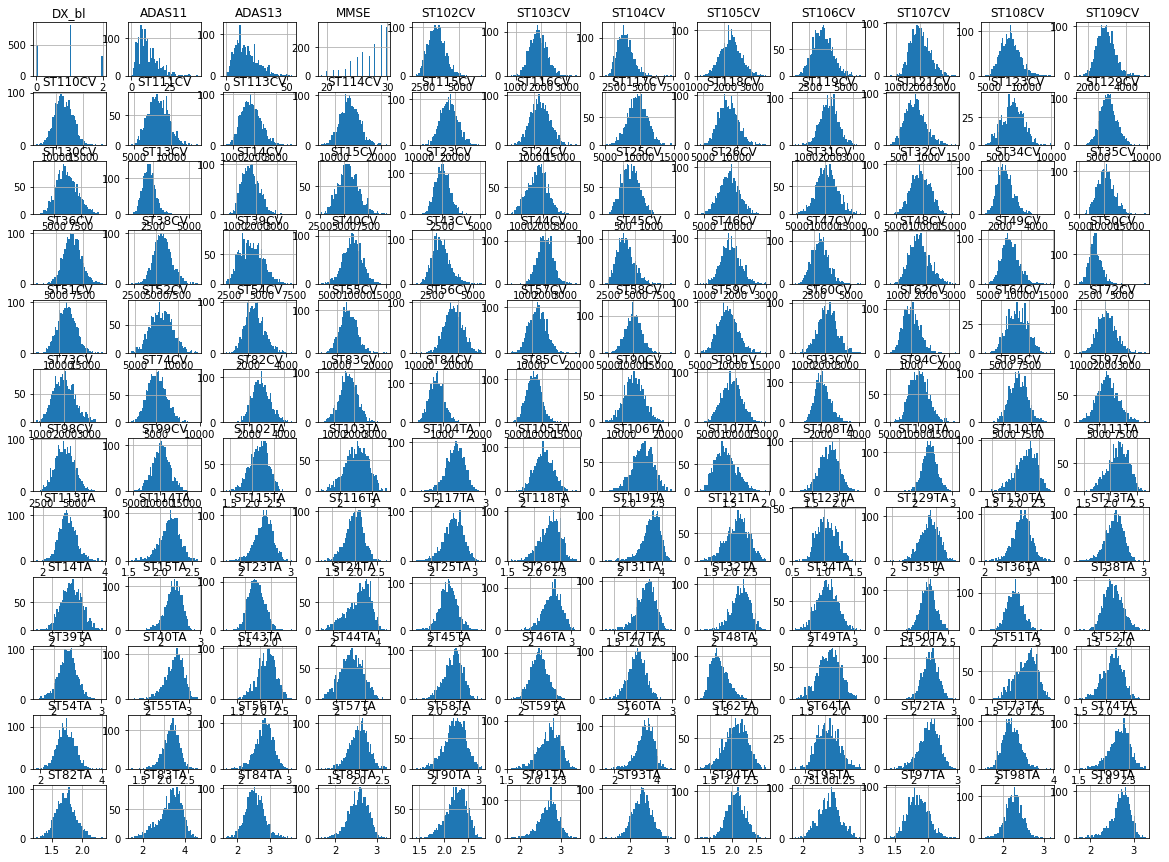

In [6]:
#all_df["DX_bl"].hist(bins=50, figsize=(8,6)) # bins는 막대 구간 수량 (막대의 영역을 얼마나 채울지 결정됨), figsize는 가로,세로 크기 지정
all_df.hist(bins=50, figsize=(20,15)) # 전체 feature 에 대해 histogram 표시 - bins값, figsize값은 교재 참고함
plt.show() #일괄로 표시

## 4) 데이터간 상관관계 분석

-- DX_bl --
 DX_bl      1.000000
ADAS13     0.722164
ADAS11     0.682012
ST73CV     0.008397
ST14TA    -0.027894
             ...   
ST123TA   -0.428103
ST64TA    -0.429080
ST83TA    -0.439323
ST24TA    -0.465494
MMSE      -0.723285
Name: DX_bl, Length: 144, dtype: float64
-- ST24TA --
 ST24TA    1.000000
ST24CV    0.707430
ST83TA    0.705330
ST60TA    0.646598
ST64TA    0.632547
            ...   
ST73CV    0.060309
ST14TA    0.049367
DX_bl    -0.465494
ADAS11   -0.533028
ADAS13   -0.561979
Name: ST24TA, Length: 144, dtype: float64


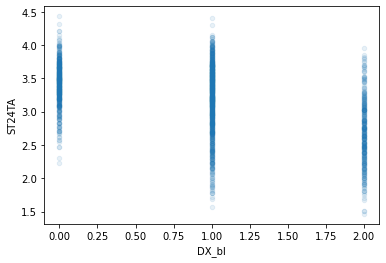

In [16]:
corr_matrix = all_df.corr() # 상관관계 계산
#print(corr_matrix)
print("-- DX_bl --\n", corr_matrix["DX_bl"].sort_values(ascending=False)) # DX_bl 상관관계 찾아보기

#  ST24TA 가 -0.465494 상관관계가 가장 큰것으로 보임 ('DX_bl', 'ADAS11', 'ADAS13', 'MMSE' 값 제외)

print("-- ST24TA --\n", corr_matrix["ST24TA"].sort_values(ascending=False)) # ST24TA 상관관계 찾아보기
all_df.plot(kind="scatter", x="DX_bl", y="ST24TA", alpha=0.1) # 흩어뿌리기

count    1606.000000
mean        3.160866
std         0.524625
min         1.465000
25%         2.828000
50%         3.250500
75%         3.549000
max         4.432000
Name: ST24TA, dtype: float64
'ST24TA' contain NaN values ? True
AxesSubplot(0.125,0.125;0.775x0.755)


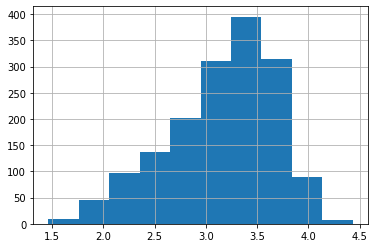

In [17]:
print(all_df["ST24TA"].describe()) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print("'ST24TA' contain NaN values ?",np.any(np.isnan(all_df["ST24TA"]) ) ) # NaN값 있는지 확인
print(all_df["ST24TA"].hist()) #그래프 표시

## 5) 데이터 전처리 : NaN -> 0 -> mean

In [18]:
#all_df.fillna(0,inplace=True) # NaN값을 0 으로 채움
all_df0 = all_df.fillna(0).copy() # 0을 채운 후 복사하여 사용, 아래에서 mena값을 위해

print("'all_df' contain NaN values ?",np.any(np.isnan(all_df) ) ) # NaN값 있는지 확인
print("'all_df0' contain NaN values ?",np.any(np.isnan(all_df0) ) ) # NaN값 있는지 확인

'all_df' contain NaN values ? True
'all_df0' contain NaN values ? False


In [19]:
all_data = all_df.fillna( all_df0.mean() ).copy() # NaN값을 평균값으로 채움, 위에서 0을 채운값으로 평균값 계산

print("'all_df' contain NaN values ?",np.any(np.isnan(all_df) ) ) # NaN값 있는지 확인
print("'all_data' contain NaN values ?",np.any(np.isnan(all_data) ) ) # NaN값 있는지 확인

'all_df' contain NaN values ? True
'all_data' contain NaN values ? False


## 6) train, valid 데이터 분리: 준비 작업 - 상관관계 분석결과 반영(컬럼추가)

      ST24TA ST24TA_cut
0      3.482          3
1      3.406          3
2      3.192          3
3      3.395          3
4      3.702          3
...      ...        ...
1602   2.459          2
1603   2.268          2
1604   2.758          2
1605   1.905          1
1606   3.044          3

[1607 rows x 2 columns]
3    0.652147
2    0.301805
1    0.027380
4    0.018668
0    0.000000
5    0.000000
Name: ST24TA_cut, dtype: float64


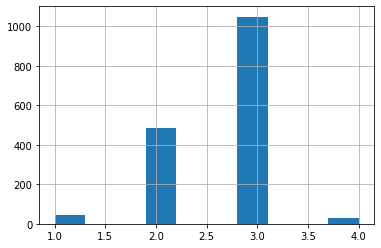

In [20]:
# train, valid 데이터 분리를 위해 사전 작업 : StratifiedShuffleSplit() 활용

# 먼저 all_data 를 나눌때 ST24TA 분포를 고려하기 위해 ST24TA_cut 범주 그룹값 추가
all_data["ST24TA_cut"] = pd.cut(all_data["ST24TA"], bins=[0, 1, 2, 3, 4, 5, np.inf], labels=[0, 1, 2, 3, 4, 5] ) #구간별로 나눠서 범주값 매핑, np.inf는 무한대 의미
all_data["ST24TA_cut"].hist() #그래프 표시
print(all_data[["ST24TA","ST24TA_cut"]]) # 맵핑된 정보 확인 ST24TA -> ST24TA_cut
#print(all_data[all_data["ST24TA"] > 3.0 ] ) # ST24TA값이 50보다 큰것들 표시
print( all_data["ST24TA_cut"].value_counts() / len(all_data) ) #  전체 데이터 내에 ST24TA_cut 분포 비율 확인

In [21]:
all_data["ST24TA_cut"]

0       3
1       3
2       3
3       3
4       3
       ..
1602    2
1603    2
1604    2
1605    1
1606    3
Name: ST24TA_cut, Length: 1607, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

## 7) train, valid 데이터 분리 : StratifiedShuffleSplit 활용

In [22]:
# StratifiedShuffleSplit 를 활용하여 데이터 나누기 (각 구간별, 범주별 데이터 나누기)
split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # train/test 1개로 분할, test_size 비율지정, 재현가능성을 위해 난수 초기값 지정
for train_index, valid_index in split1.split( all_data, all_data["ST24TA_cut"] ): # all_data를 ST24TA_cut 고려하여 데이터 나누기
	train_data = all_data.iloc[train_index].copy() # train 데이터
	valid_data = all_data.iloc[valid_index].copy() # valid 데이터

print("-- train_data --\n", train_data["ST24TA_cut"].value_counts() / len(train_data)) #train_valid_tmp 내에 ST24TA_cut 분포 비율 확인
print("-- valid_data --\n", valid_data["ST24TA_cut"].value_counts() / len(valid_data)) #test_data 내에 ST24TA_cut 분포 비율 확인
#print(train_data.info()) #데이터 컬럼별 건수, type등 표시
#print(train_data.head()) #데이터 앞쪽 5개 row 데이터 표시
#print(train_data.describe()) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시


-- train_data --
 3    0.652140
2    0.301946
1    0.027237
4    0.018677
0    0.000000
5    0.000000
Name: ST24TA_cut, dtype: float64
-- valid_data --
 3    0.652174
2    0.301242
1    0.027950
4    0.018634
0    0.000000
5    0.000000
Name: ST24TA_cut, dtype: float64


In [23]:
# 데이터 나누기 위해 추가된 ST24TA_cut 삭제
for set_ in (train_data, valid_data):
	set_.drop("ST24TA_cut", axis=1, inplace=True)

In [24]:
# 데이터 shape 확인
print( "train_data.shape=",train_data.shape )
print( "valid_data.shape=",valid_data.shape )

train_data.shape= (1285, 144)
valid_data.shape= (322, 144)


In [25]:
# 나의 과제그룹 : Task 1 (3-class Classification): Predict the diagnosis group of subjects

X_train = train_data[[c for c in all_df.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE']]].copy()
y_train = train_data['DX_bl'].copy()

X_valid = valid_data[[c for c in all_df.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE']]].copy()
y_valid = valid_data['DX_bl'].copy()

#y1  = train_df['ADAS11']
#y2  = train_df['ADAS13']
#y3  = train_df['MMSE']


In [26]:
# 데이터 확인
print( X_train.value_counts() ) # 값 별로 건수 표시
#print( X_train ) # 전체 데이터 확인
#print( X_train.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
#X_train.to_numpy() # numpy 배열로 변환

print( y_train.value_counts() ) # 값 별로 건수 표시
#print( y_train ) # 전체 데이터 확인
#print( y_train.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
#y_train.to_numpy() # numpy 배열로 변환

print( "X_train.shape=",X_train.shape )
print( "y_train.shape=",y_train.shape )
print( "X_valid.shape=",X_valid.shape )
print( "y_valid.shape=",y_valid.shape )

ST102CV  ST103CV  ST104CV  ST105CV  ST106CV  ST107CV  ST108CV  ST109CV  ST110CV  ST111CV  ST113CV  ST114CV  ST115CV  ST116CV  ST117CV  ST118CV  ST119CV  ST121CV  ST123CV      ST129CV  ST130CV  ST13CV  ST14CV  ST15CV  ST23CV  ST24CV  ST25CV  ST26CV  ST31CV  ST32CV  ST34CV  ST35CV  ST36CV  ST38CV  ST39CV  ST40CV  ST43CV  ST44CV  ST45CV  ST46CV  ST47CV  ST48CV  ST49CV  ST50CV  ST51CV  ST52CV  ST54CV  ST55CV  ST56CV  ST57CV  ST58CV  ST59CV  ST60CV  ST62CV  ST64CV       ST72CV  ST73CV  ST74CV  ST82CV  ST83CV  ST84CV  ST85CV  ST90CV  ST91CV  ST93CV  ST94CV  ST95CV  ST97CV  ST98CV  ST99CV  ST102TA  ST103TA  ST104TA  ST105TA  ST106TA  ST107TA  ST108TA  ST109TA  ST110TA  ST111TA  ST113TA  ST114TA  ST115TA  ST116TA  ST117TA  ST118TA  ST119TA  ST121TA  ST123TA   ST129TA  ST130TA  ST13TA  ST14TA  ST15TA  ST23TA  ST24TA  ST25TA  ST26TA  ST31TA  ST32TA  ST34TA  ST35TA  ST36TA  ST38TA  ST39TA  ST40TA  ST43TA  ST44TA  ST45TA  ST46TA  ST47TA  ST48TA  ST49TA  ST50TA  ST51TA  ST52TA  ST54TA  ST55TA  ST56

## 8) train, valid 데이터 MinMax scale

In [27]:
# MinMax scale features into 0~1 (e.g., use MinMaxScaler)
scaler1 = MinMaxScaler() # 객체 생성 : X_train 용
scaler1.fit(X_train) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
X_train_scaled = scaler1.transform(X_train) # 데이터 변환, 결과는 배열로 반환됨
X_train = np.round(X_train_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)

scaler2 = MinMaxScaler() # 객체 생성 : X_valid 용
scaler2.fit(X_valid) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
X_valid_scaled = scaler2.transform(X_valid) # 데이터 변환, 결과는 배열로 반환됨
X_valid = np.round(X_valid_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)

print("My Train data range :", np.min(X_train) , "~", np.max(X_train) )
print("My Valid data range :", np.min(X_valid) , "~", np.max(X_valid) )

My Train data range : 0.0 ~ 1.0
My Valid data range : 0.0 ~ 1.0


## 9) 모델 비교 (AUC 기준)

### ① OneVsRestClassifier(GaussianNB()) 모델 

In [28]:
# ** 각 모델 비교 OneVsRestClassifier(GaussianNB()), DecisionTreeClassifier, RandomForestClassifier **

# ① OneVsRestClassifier(GaussianNB()) 모델 
#나이브 베이즈(naive bayes) 분류기는 선형 모델과 매우 유사함, LogisticRegression이나 LinearSVC 같은 선형 분류기 보다 훈련 속도가 빠르지만, 일반화 성능이 조금 뒤쳐짐
#각 특성을 개별로 취급해 파라미터를 학습하고 그 특성에서 클래스별 통계를 단순하게 취합
#GaussianNB : 연속적인 어떤 데이터에도 적용가능
#BernoulliNB : 이진(binary) 데이터에 적용가능
#MultinomialNB : 카운트 데이터(ex 문장에 나타난 단어의 횟수)에 적용가능

ovr_clf = OneVsRestClassifier(GaussianNB()) # 모델 객체 생성
ovr_clf.fit(X_train, y_train) # 모델 피팅 : X_train, y_train


OneVsRestClassifier(estimator=GaussianNB())

OneVsRestClassifier(GaussianNB()) confusion_matrix
 [[51 35 18]
 [46 53 62]
 [ 3 10 44]]
accuracy= 0.45962732919254656
Precision: 0.4685516787360105
Recall: 0.5305023288432898
F1 score: 0.46515141819009226
AUC: 0.6935273974415251
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       104
           1       0.54      0.33      0.41       161
           2       0.35      0.77      0.49        57

    accuracy                           0.46       322
   macro avg       0.47      0.53      0.47       322
weighted avg       0.50      0.46      0.45       322



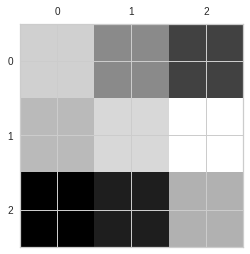

In [34]:
ovr_pred = ovr_clf.predict(X_valid) # X_valid 로 예측 label 생성
ovr_prob = ovr_clf.predict_proba(X_valid) #X_valid 로 예측 확률값 생성 
ovr_conf_mx =  confusion_matrix(y_valid, ovr_pred)
print( "OneVsRestClassifier(GaussianNB()) confusion_matrix\n", ovr_conf_mx )
print( "accuracy=", accuracy_score(y_valid, ovr_pred) )# 정확도
print('Precision:',precision_score(y_valid, ovr_pred, average = 'macro'))
print('Recall:',recall_score(y_valid, ovr_pred, average = 'macro'))
print('F1 score:',f1_score(y_valid, ovr_pred, average = 'macro'))
print('AUC:',roc_auc_score(y_valid, ovr_prob, multi_class = 'ovr'))
print(classification_report(y_valid, ovr_pred)) # 각 scores를 보기좋게 table 방식 표시

plt.matshow(ovr_conf_mx, cmap=plt.cm.gray) # matplot의 matshow()함수를 이용해서 시각적으로 확인
plt.show()

In [24]:
# 대각선의 그림중에서 약간 더 어둡게 보이는 부분이 예측을 못한다는 의미

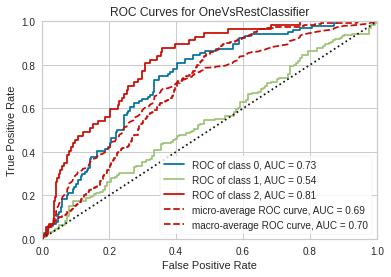

AUC= 0.6960101436478444


In [35]:
# ROC 커브 그리기
plt_roc_curve = ROCAUC(ovr_clf) #

# Fitting to the training data first then scoring with the test data                                    
plt_roc_curve.fit(X_train, y_train)
plt_roc_curve.score(X_valid, y_valid)
plt_roc_curve.show()

print("AUC=", plt_roc_curve.score_)

### ② DecisionTreeClassifier 모델

In [36]:
# ② DecisionTreeClassifier 모델
tree_clf = DecisionTreeClassifier() # 객체 생성
tree_clf.fit(X_train, y_train) # 모델 피팅 :X_train, y_train

DecisionTreeClassifier()

DecisionTreeClassifier confusion_matrix
 [[50 44 10]
 [58 70 33]
 [ 4 33 20]]
accuracy= 0.43478260869565216
Precision: 0.41335978835978837
Recall: 0.4221430108157797
F1 score: 0.41694725028058355
AUC: 0.5569167237023258
              precision    recall  f1-score   support

           0       0.45      0.48      0.46       104
           1       0.48      0.43      0.45       161
           2       0.32      0.35      0.33        57

    accuracy                           0.43       322
   macro avg       0.41      0.42      0.42       322
weighted avg       0.44      0.43      0.44       322



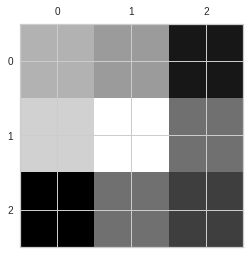

In [37]:
tree_pred = tree_clf.predict(X_valid) # X_valid로 예측 label 생성
tree_prob = tree_clf.predict_proba(X_valid) # X_valid 로 예측 확률값 생성
tree_conf_mx =  confusion_matrix(y_valid, tree_pred)
print( "DecisionTreeClassifier confusion_matrix\n", tree_conf_mx )
print( "accuracy=", accuracy_score(y_valid, tree_pred) )# 정확도
print('Precision:',precision_score(y_valid, tree_pred, average = 'macro'))
print('Recall:',recall_score(y_valid, tree_pred, average = 'macro'))
print('F1 score:',f1_score(y_valid, tree_pred, average = 'macro'))
print('AUC:',roc_auc_score(y_valid, tree_prob, multi_class = 'ovr'))
print(classification_report(y_valid, tree_pred)) # 각 scores를 보기좋게 table 방식 표시

plt.matshow(tree_conf_mx, cmap=plt.cm.gray) # matplot의 matshow()함수를 이용해서 시각적으로 확인
plt.show()

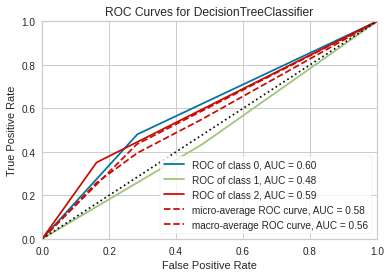

AUC= 0.5569167237023258


In [38]:
# ROC 커브 그리기
plt_roc_curve = ROCAUC(tree_clf) #

# Fitting to the training data first then scoring with the test data                                    
plt_roc_curve.fit(X_train, y_train)
plt_roc_curve.score(X_valid, y_valid)
plt_roc_curve.show()

print("AUC=", plt_roc_curve.score_)

### ③ RandomForestClassifier 모델

In [39]:
# ③ RandomForestClassifier 모델
#forest_clf = RandomForestClassifier(max_depth = 3, random_state = 99) # 객체 생성
forest_clf = RandomForestClassifier(random_state = 99) # 객체 생성
forest_clf.fit(X_train, y_train) # 모델 피팅 : X_train, y_train

RandomForestClassifier(random_state=99)

RandomForestClassifier confusion_matrix
 [[ 36  66   2]
 [ 31 113  17]
 [  0  28  29]]
accuracy= 0.5527950310559007
Precision: 0.5624579397697502
Recall: 0.5189297100052249
F1 score: 0.5291880062475027
AUC: 0.729807782453353
              precision    recall  f1-score   support

           0       0.54      0.35      0.42       104
           1       0.55      0.70      0.61       161
           2       0.60      0.51      0.55        57

    accuracy                           0.55       322
   macro avg       0.56      0.52      0.53       322
weighted avg       0.55      0.55      0.54       322



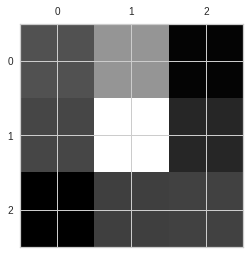

In [40]:
forest_pred = forest_clf.predict(X_valid) # X_valid로 예측 label 생성
forest_prob = forest_clf.predict_proba(X_valid) # X_valid로 예측 확률값 생성
forest_conf_mx =  confusion_matrix(y_valid, forest_pred)
print( "RandomForestClassifier confusion_matrix\n", forest_conf_mx )
print( "accuracy=", accuracy_score(y_valid, forest_pred) )# 정확도
print('Precision:',precision_score(y_valid, forest_pred, average = 'macro'))
print('Recall:',recall_score(y_valid, forest_pred, average = 'macro'))
print('F1 score:',f1_score(y_valid, forest_pred, average = 'macro'))
print('AUC:',roc_auc_score(y_valid, forest_prob, multi_class = 'ovr'))
print(classification_report(y_valid, forest_pred)) # 각 scores를 보기좋게 table 방식 표시

plt.matshow(forest_conf_mx, cmap=plt.cm.gray) # matplot의 matshow()함수를 이용해서 시각적으로 확인
plt.show()

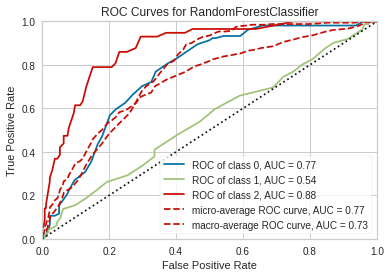

AUC= 0.7299797766626548


In [41]:
# ROC 커브 그리기
plt_roc_curve = ROCAUC(forest_clf) #

# Fitting to the training data first then scoring with the test data                                    
plt_roc_curve.fit(X_train, y_train)
plt_roc_curve.score(X_valid, y_valid)
plt_roc_curve.show()

print("AUC=", plt_roc_curve.score_)

## 10) 모델 선택 및 튜닝 : GridSearchCV - RandomForestClassifier

In [42]:
# 소견
# 모델들의 AUC 값을 비교해보면 RandomForestClassifier 성능이 좋음,  RandomForestClassifier 모델을 선택하여 튜닝
# True Positive 를 중요하게 생각하여 scoring는 Muticlass용 roc_auc_ovr (OneVsRest) 사용, AUC가 높으면 분류 모델 성능이 좋음

In [46]:
#GridSearchCV 활용하여 RandomForestClassifier 모델의 하이퍼파라미터 조합을 탐색
#param_grid = {
#        'n_estimators': # 결정 트리의 수 (기본 10), 클수록 좋은 성능이 나올 수 있으나, 무조건은 아님
#        'max_depth':  # 최대 깊이
#        'min_samples_leaf': # 리프 노드가 되기 위한 최소한의 샘플 수
#        'min_samples_split': # 노드를 분할하기 위한 최소 데이터 수
#        'bootstrap': [False, True] # tree가 조금씩 다른 데이터셋으로 만들지
#}
param_grid = [
        {'n_estimators': [3, 10, 50, 100, 200], 'max_features': [5,10,45,70,100,140]},  # n_estimators : (기본 10), 클수록 좋은 성능이 나올 수 있으나, 무조건은 아님, max_features : 최대 선택할 특성의 수량
        {'bootstrap': [False], 'n_estimators': [3, 10, 50], 'max_features': [5,10,45]}, # bootstrap : tree가 조금씩 다른 데이터셋으로 만들지
    ]
#scorers = {
#    'precision_score': make_scorer(precision_score),
#    'recall_score': make_scorer(recall_score),
#    'accuracy_score': make_scorer(accuracy_score),
#    'roc_auc_score': make_scorer(roc_auc_score)
#    'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr) -- (OneVsRest)
#    'roc_auc_ovo': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovo)...등
#}
g_forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(g_forest_clf, param_grid, cv=3, 
                           scoring="roc_auc_ovr", # True Positive 를 중요하게 생각하여 scoring는 roc_auc_ovr 사용, AUC가 높으면 분류 모델 성능이 좋다고 할 수 있음
                           return_train_score=True)
 
grid_search.fit(X_train, y_train) # 모델 피팅 : train_data, train_label

grid_search.best_params_ # 주어진 조건중에 최적의 파라미터 표시

{'max_features': 10, 'n_estimators': 100}

In [48]:
# grid_search 평가 점수 목록
cvres = grid_search.cv_results_
#print(cvres)
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

#scores_df = pd.DataFrame(grid_search.cv_results_)
#scores_df = scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]
#print(scores_df)

# 최고의 파라미터 저장해줌
print(f"최적의 파라미터: {grid_search.best_params_}")
print(f"최고 roc_auc_ovr 점수: {grid_search.best_score_}")

0.6106537865605022 {'max_features': 5, 'n_estimators': 3}
0.6672627293241725 {'max_features': 5, 'n_estimators': 10}
0.6823132856263864 {'max_features': 5, 'n_estimators': 50}
0.7079393086054534 {'max_features': 5, 'n_estimators': 100}
0.7045371573658133 {'max_features': 5, 'n_estimators': 200}
0.5942585928283548 {'max_features': 10, 'n_estimators': 3}
0.645843598383638 {'max_features': 10, 'n_estimators': 10}
0.6977246597670667 {'max_features': 10, 'n_estimators': 50}
0.7123352874509562 {'max_features': 10, 'n_estimators': 100}
0.7104201690384278 {'max_features': 10, 'n_estimators': 200}
0.6027252869384169 {'max_features': 45, 'n_estimators': 3}
0.669153224853487 {'max_features': 45, 'n_estimators': 10}
0.6986125766500194 {'max_features': 45, 'n_estimators': 50}
0.7114592986489171 {'max_features': 45, 'n_estimators': 100}
0.7045077058016148 {'max_features': 45, 'n_estimators': 200}
0.6032476369700179 {'max_features': 70, 'n_estimators': 3}
0.6574226004050102 {'max_features': 70, 'n_es

### GridSearchCV 결과 분석

In [43]:
# bootstrap False 의 성능이 떨어짐
# n_estimators=100 은 주어진 탐색 범위의 최댓값(점수가 향상될 수 있음) -> 더 큰값이 성능이 좋을 수 있으며, 검색해볼 필요 있음
# 다만, default 값으로 사용했을때가 AUC 가장 높았기 때문에 본 과제에서는 default값으로 사용하기로 결정
#  * (기본값 0.729807782453353  >  GridSearchCV 0.7123352874509562)

## 11) 모델 저장 및 PC 다운로드

In [44]:
# 가장 AUC값이 높은 모델 저장 : RandomForestClassifier
joblib.dump(forest_clf, 'clf_2020511021.pkl', compress=1)

# PC로 다운로드 받기
files.download('clf_2020511021.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 기타1) 저장한 모델 다시 로딩 후 체크

In [125]:
######### 파일 로딩 후 튜닝 없이 모델 확인 해보기 #######################################

In [45]:
# 나의 과제그룹 : Task 1 (3-class Classification): Predict the diagnosis group of subjects
from google.colab import files
import joblib

import pandas as pd
import numpy as np
np.random.seed(20220513)

# 선정된 모델library import
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler #sklearn에서 제공하는 Feature Scaling Library

model_files = files.upload() # You can upload multiple files at once. If there are any problems uploading, try uploading to Colab directly using the file explorer in the sidebar.

# 나의 과제그룹 : Task 1 (3-class Classification): Predict the diagnosis group of subjects
my_clf = joblib.load("clf_2020511021.pkl") # 사전에 피팅한 모델 로딩
#reg1 = joblib.load("reg1.pkl")
#reg2 = joblib.load("reg2.pkl")
#reg3 = joblib.load("reg3.pkl")



Saving clf_2020511021.pkl to clf_2020511021 (1).pkl


y_valid.shape= (322,)
my_prob.shape= (322, 3)
RandomForestClassifier confusion_matrix
 [[ 36  66   2]
 [ 31 113  17]
 [  0  28  29]]
accuracy= 0.5527950310559007
Precision: 0.5624579397697502
Recall: 0.5189297100052249
F1 score: 0.5291880062475027
AUC: 0.729807782453353
              precision    recall  f1-score   support

           0       0.54      0.35      0.42       104
           1       0.55      0.70      0.61       161
           2       0.60      0.51      0.55        57

    accuracy                           0.55       322
   macro avg       0.56      0.52      0.53       322
weighted avg       0.55      0.55      0.54       322



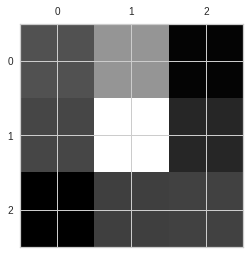

In [46]:
my_pred = my_clf.predict(X_valid) # 예측 label 생성
my_prob = my_clf.predict_proba(X_valid) # 예측 확률값 생성
my_conf_mx =  confusion_matrix(y_valid, my_pred)

print( "y_valid.shape=",y_valid.shape )
print( "my_prob.shape=",my_prob.shape )

print( "RandomForestClassifier confusion_matrix\n", my_conf_mx )
print( "accuracy=", accuracy_score(y_valid, my_pred) )# 정확도
print('Precision:',precision_score(y_valid, my_pred, average = 'macro'))
print('Recall:',recall_score(y_valid, my_pred, average = 'macro'))
print('F1 score:',f1_score(y_valid, my_pred, average = 'macro'))
print('AUC:',roc_auc_score(y_valid, my_prob, multi_class = 'ovr'))
print(classification_report(y_valid, my_pred)) # 각 scores를 보기좋게 table 방식 표시

plt.matshow(my_conf_mx, cmap=plt.cm.gray) # matplot의 matshow()함수를 이용해서 시각적으로 확인
plt.show()

### 기타2) 테스트 데이터 체크 : 정확도 의미없으나 생성 확인용

In [ ]:
########## 정확도는 의미 없음 : 제대로 만들어졌는지 확인용 ###############################

In [48]:
test_files = files.upload() # 테스트 파일 업로드

test_data_1 = pd.read_csv('dummy_test_data_1_2020511021.csv') # test_data_1 로딩
test_data_2 = pd.read_csv('dummy_test_data_2_2020511021.csv') # test_data_1 로딩
test_data_3 = pd.read_csv('dummy_test_data_3_2020511021.csv') # test_data_1 로딩

# 데이터 확인
print( "test_data_1.shape=",test_data_1.shape )
print( "test_data_2.shape=",test_data_2.shape )
print( "test_data_3.shape=",test_data_3.shape )

Saving dummy_test_data_1_2020511021.csv to dummy_test_data_1_2020511021.csv
Saving dummy_test_data_2_2020511021.csv to dummy_test_data_2_2020511021.csv
Saving dummy_test_data_3_2020511021.csv to dummy_test_data_3_2020511021.csv
test_data_1.shape= (10, 147)
test_data_2.shape= (50, 147)
test_data_3.shape= (100, 147)


In [57]:
# 데이터 전처리 ① : NaN --> 0 --> mean값으로 채움
X_test1_0 = test_data_1.fillna(0).copy() # 0을 채운 후 복사하여 사용, 아래에서 mena값을 위해
print("'test_data_1' contain NaN values ?",np.any(np.isnan(test_data_1) ) ) # NaN값 있는지 확인
print("'X_test1_0' contain NaN values ?",np.any(np.isnan(X_test1_0) ) ) # NaN값 있는지 확인
X_test1_m = test_data_1.fillna( X_test1_0.mean() ).copy() # NaN값을 평균값으로 채움, 위에서 0을 채운값으로 평균값 계산
print("'test_data_1' contain NaN values ?",np.any(np.isnan(test_data_1) ) ) # NaN값 있는지 확인
print("'X_test1_m' contain NaN values ?",np.any(np.isnan(X_test1_m) ) ) # NaN값 있는지 확인

X_test2_0 = test_data_2.fillna(0).copy() # 0을 채운 후 복사하여 사용, 아래에서 mena값을 위해
print("'test_data_2' contain NaN values ?",np.any(np.isnan(test_data_2) ) ) # NaN값 있는지 확인
print("'X_test2_0' contain NaN values ?",np.any(np.isnan(X_test2_0) ) ) # NaN값 있는지 확인
X_test2_m = test_data_2.fillna( X_test1_0.mean() ).copy() # NaN값을 평균값으로 채움, 위에서 0을 채운값으로 평균값 계산
print("'test_data_2' contain NaN values ?",np.any(np.isnan(test_data_2) ) ) # NaN값 있는지 확인
print("'X_test2_m' contain NaN values ?",np.any(np.isnan(X_test2_m) ) ) # NaN값 있는지 확인

X_test3_0 = test_data_3.fillna(0).copy() # 0을 채운 후 복사하여 사용, 아래에서 mena값을 위해
print("'test_data_3' contain NaN values ?",np.any(np.isnan(test_data_3) ) ) # NaN값 있는지 확인
print("'X_test3_0' contain NaN values ?",np.any(np.isnan(X_test3_0) ) ) # NaN값 있는지 확인
X_test3_m = test_data_3.fillna( X_test1_0.mean() ).copy() # NaN값을 평균값으로 채움, 위에서 0을 채운값으로 평균값 계산
print("'test_data_3' contain NaN values ?",np.any(np.isnan(test_data_3) ) ) # NaN값 있는지 확인
print("'X_test3_m' contain NaN values ?",np.any(np.isnan(X_test3_m) ) ) # NaN값 있는지 확인


'test_data_1' contain NaN values ? True
'X_test1_0' contain NaN values ? False
'test_data_1' contain NaN values ? True
'X_test1_m' contain NaN values ? False
'test_data_2' contain NaN values ? True
'X_test2_0' contain NaN values ? False
'test_data_2' contain NaN values ? True
'X_test2_m' contain NaN values ? False
'test_data_3' contain NaN values ? True
'X_test3_0' contain NaN values ? False
'test_data_3' contain NaN values ? True
'X_test3_m' contain NaN values ? False


In [58]:
# 데이터 분리
X_test1 = X_test1_m[[c for c in X_test1_m.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE','DX_bl_0','DX_bl_1','DX_bl_2']]].copy()
y_test1 = X_test1_m['DX_bl'].copy()

X_test2 = X_test2_m[[c for c in X_test2_m.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE','DX_bl_0','DX_bl_1','DX_bl_2']]].copy()
y_test2 = X_test2_m['DX_bl'].copy()

X_test3 = X_test3_m[[c for c in X_test3_m.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE','DX_bl_0','DX_bl_1','DX_bl_2']]].copy()
y_test3 = X_test3_m['DX_bl'].copy()

print( "X_test1.shape=",X_test1.shape )
print( "y_test1.shape=",y_test1.shape )
print( "X_test2.shape=",X_test2.shape )
print( "y_test2.shape=",y_test2.shape )
print( "X_test3.shape=",X_test3.shape )
print( "y_test3.shape=",y_test3.shape )

X_test1.shape= (10, 140)
y_test1.shape= (10,)
X_test2.shape= (50, 140)
y_test2.shape= (50,)
X_test3.shape= (100, 140)
y_test3.shape= (100,)


In [53]:
# 데이터 전처리 ② : scaling
# MinMax scale features into 0~1 (e.g., use MinMaxScaler)
scaler_test1 = MinMaxScaler() # 객체 생성
scaler_test1.fit(X_test1) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
X_test1_scaled = scaler_test1.transform(X_test1) # 데이터 변환, 결과는 배열로 반환됨
X_test1s = np.round(X_test1_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)
print("X_test1s data range :", np.min(X_test1s) , "~", np.max(X_test1s) )

scaler_test2 = MinMaxScaler() # 객체 생성
scaler_test2.fit(X_test2) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
X_test2_scaled = scaler_test2.transform(X_test2) # 데이터 변환, 결과는 배열로 반환됨
X_test2s = np.round(X_test2_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)
print("X_test2s data range :", np.min(X_test2s) , "~", np.max(X_test2s) )

scaler_test3 = MinMaxScaler() # 객체 생성
scaler_test3.fit(X_test3) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
X_test3_scaled = scaler_test3.transform(X_test3) # 데이터 변환, 결과는 배열로 반환됨
X_test3s = np.round(X_test3_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)
print("X_test3s data range :", np.min(X_test3s) , "~", np.max(X_test3s) )


X_test1s data range : 0.0 ~ 1.0
X_test2s data range : 0.0 ~ 1.0
X_test3s data range : 0.0 ~ 1.0


In [54]:
my_pred = my_clf.predict(X_test1s) # 예측 label 생성
my_prob = my_clf.predict_proba(X_test1s) # 예측 확률값 생성
my_conf_mx =  confusion_matrix(y_test1, my_pred)

print( "y_test1.shape=",y_test1.shape )
print( "my_prob.shape=",my_prob.shape )

print( "RandomForestClassifier confusion_matrix\n", my_conf_mx )
print( "accuracy=", accuracy_score(y_test1, my_pred) )# 정확도
print('Precision:',precision_score(y_test1, my_pred, average = 'macro'))
print('Recall:',recall_score(y_test1, my_pred, average = 'macro'))
print('F1 score:',f1_score(y_test1, my_pred, average = 'macro'))
#print('AUC:',roc_auc_score(y_test1, my_prob, multi_class = 'ovr')) #예측 데이터가 class 두종류만 있어서 에러남, 임의로 추가할수 없어서 test1에서만 주석처리함
print( "y_test1.value_counts=\n",y_test1.value_counts() )
print(classification_report(y_test1, my_pred)) # 각 scores를 보기좋게 table 방식 표시

y_test1.shape= (10,)
my_prob.shape= (10, 3)
RandomForestClassifier confusion_matrix
 [[8 0]
 [0 2]]
accuracy= 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
y_test1.value_counts=
 1    8
2    2
Name: DX_bl, dtype: int64
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [55]:
my_pred = my_clf.predict(X_test2s) # 예측 label 생성
my_prob = my_clf.predict_proba(X_test2s) # 예측 확률값 생성
my_conf_mx =  confusion_matrix(y_test2, my_pred)

print( "RandomForestClassifier confusion_matrix\n", my_conf_mx )
print( "accuracy=", accuracy_score(y_test2, my_pred) )# 정확도
print('Precision:',precision_score(y_test2, my_pred, average = 'macro'))
print('Recall:',recall_score(y_test2, my_pred, average = 'macro'))
print('F1 score:',f1_score(y_test2, my_pred, average = 'macro'))
print('AUC:',roc_auc_score(y_test2, my_prob, multi_class = 'ovr'))
print(classification_report(y_test2, my_pred)) # 각 scores를 보기좋게 table 방식 표시


RandomForestClassifier confusion_matrix
 [[ 9  0  0]
 [ 2 31  0]
 [ 0  1  7]]
accuracy= 0.94
Precision: 0.9289772727272728
Recall: 0.9381313131313131
F1 score: 0.929059829059829
AUC: 0.981075227578097
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.97      0.94      0.95        33
           2       1.00      0.88      0.93         8

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.95      0.94      0.94        50



In [56]:
my_pred = my_clf.predict(X_test3s) # 예측 label 생성
my_prob = my_clf.predict_proba(X_test3s) # 예측 확률값 생성
my_conf_mx =  confusion_matrix(y_test3, my_pred)

print( "RandomForestClassifier confusion_matrix\n", my_conf_mx )
print( "accuracy=", accuracy_score(y_test3, my_pred) )# 정확도
print('Precision:',precision_score(y_test3, my_pred, average = 'macro'))
print('Recall:',recall_score(y_test3, my_pred, average = 'macro'))
print('F1 score:',f1_score(y_test3, my_pred, average = 'macro'))
print('AUC:',roc_auc_score(y_test3, my_prob, multi_class = 'ovr'))
print(classification_report(y_test3, my_pred)) # 각 scores를 보기좋게 table 방식 표시


RandomForestClassifier confusion_matrix
 [[25  0  0]
 [ 2 55  0]
 [ 0  1 17]]
accuracy= 0.97
Precision: 0.9693562610229277
Recall: 0.969785575048733
F1 score: 0.9688061201335537
AUC: 0.9724530574877353
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.98      0.96      0.97        57
           2       1.00      0.94      0.97        18

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



### 끝